# Reading Data

In [160]:
import numpy as np
from matplotlib import pyplot as plt
from collections import namedtuple
from collections import deque
from slurm import storage, files
from pprint import pprint
from colorama import Fore
import datetime

In [107]:
TempPres = namedtuple("TempPres", "temperature pressure")
Vector2 = namedtuple("Vector2", "x y")
Vector3 = namedtuple("Vector3", "x y z")
Lidar = namedtuple("Lidar","distance")
ImuSoxLis = namedtuple("ImuSoxLis", "ax ay az wx wy wz temperature mx my mz")

In [131]:
def toNumpy(data, key):
    return np.array([x[key] for x in data])

def imuToNumpy(data):
    a = np.array([x["soxlis"][0:3] for x in data])
    g = np.array([x["soxlis"][3:6] for x in data])
    t = np.array([x["soxlis"][6:7] for x in data])
    m = np.array([x["soxlis"][7:] for x in data])
    return a,g,m,t

# Data Collection

In [150]:
data = storage.read("data.pickle")

In [151]:
for k,v in data[0].items():
    print(f"{Fore.BLUE}{k}: {Fore.YELLOW}{v}{Fore.RESET}")

soxlis: ImuSoxLis(ax=-0.0024399999529123306, ay=0.02257000096142292, az=1.0152840614318848, wx=0.00855211354792118, wy=0.0036651913542300463, wz=-0.0036651913542300463, temperature=24.65234375, mx=-4.282373428344727, my=3.2446651458740234, mz=-41.9029541015625)
dps310: TempPres(temperature=22.08893585205078, pressure=842.5155639648438)
lidar: Lidar(distance=29.0)
timestamp: 1636912449.346934


In [152]:
accel, gyro, mag, temp = imuToNumpy(data)
tp = toNumpy(data, "dps310")
lidar = toNumpy(data, "lidar")

# change to 0 start
ts = toNumpy(data, "timestamp")
tss = ts[0]
ts = np.array([x - tss for x in ts])

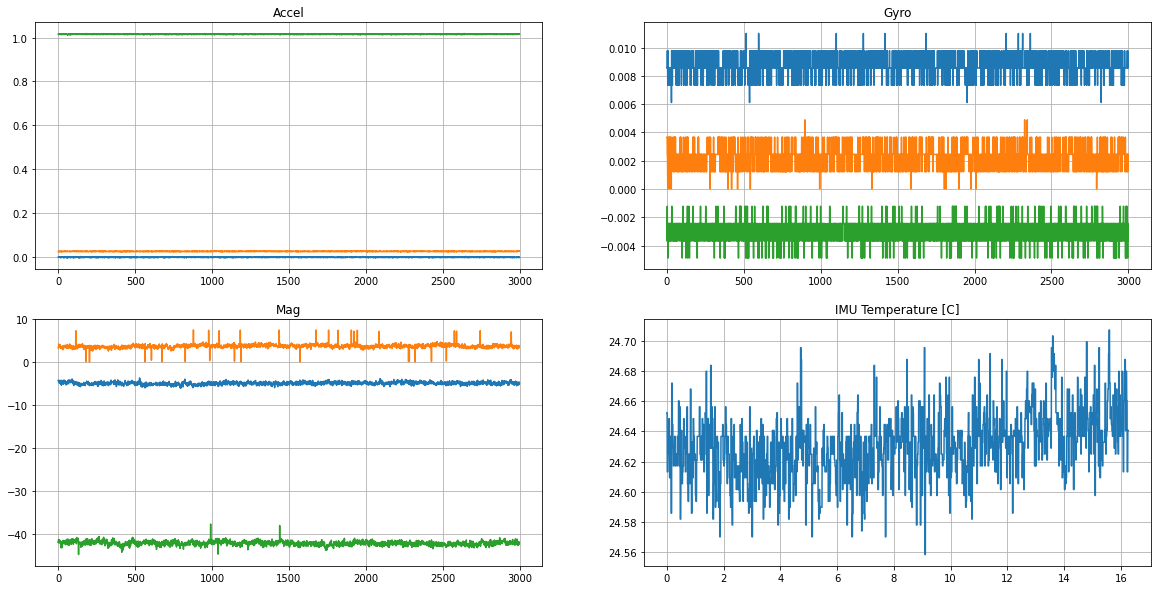

In [158]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(accel)
plt.grid(True)
plt.title("Accel");

plt.subplot(2,2,2)
plt.plot(gyro)
plt.grid(True)
plt.title("Gyro");

plt.subplot(2,2,3)
plt.plot(mag)
plt.grid(True)
plt.title("Mag");

plt.subplot(2,2,4)
plt.plot(ts,temp)
plt.grid(True)
plt.title("IMU Temperature [C]");

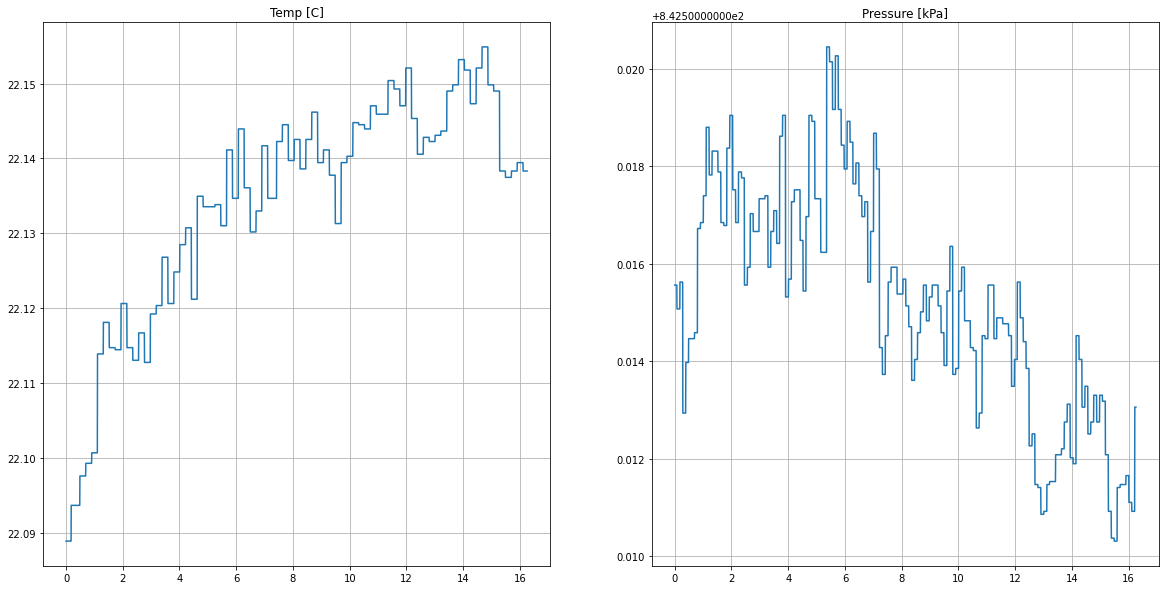

In [155]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.plot(ts,tp[:,0]); plt.grid(True); plt.title("Temp [C]")
plt.subplot(1,2,2); plt.plot(ts,tp[:,1]); plt.grid(True); plt.title("Pressure [kPa]");

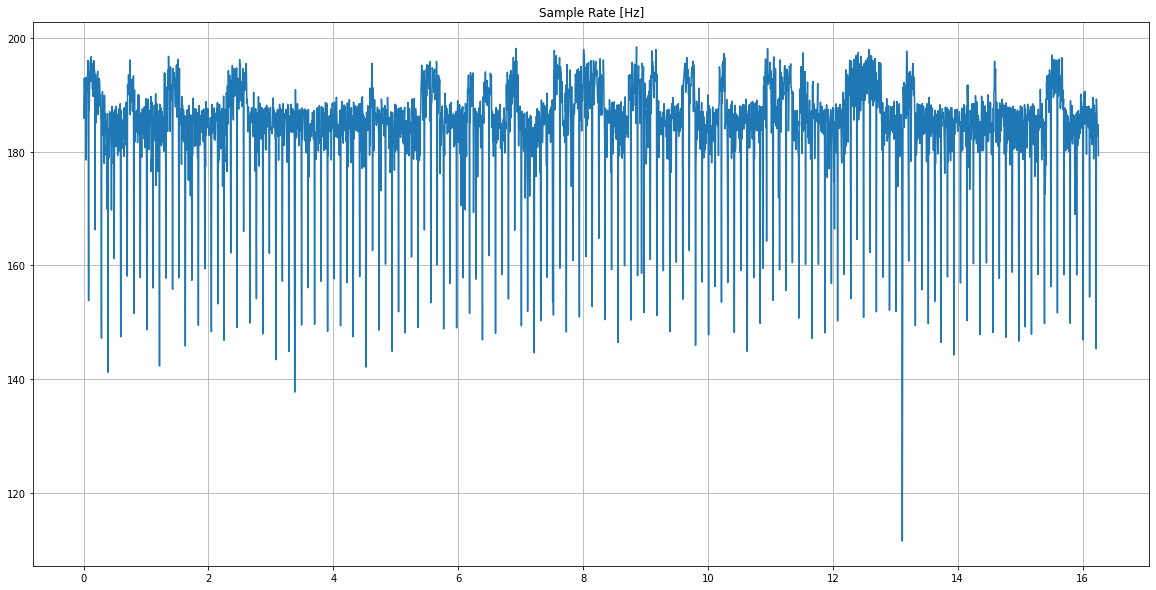

In [156]:
plt.figure(figsize=(20,10))
plt.plot(ts[1:], 1/np.diff(ts))
plt.title("Sample Rate [Hz]")
plt.grid(True);

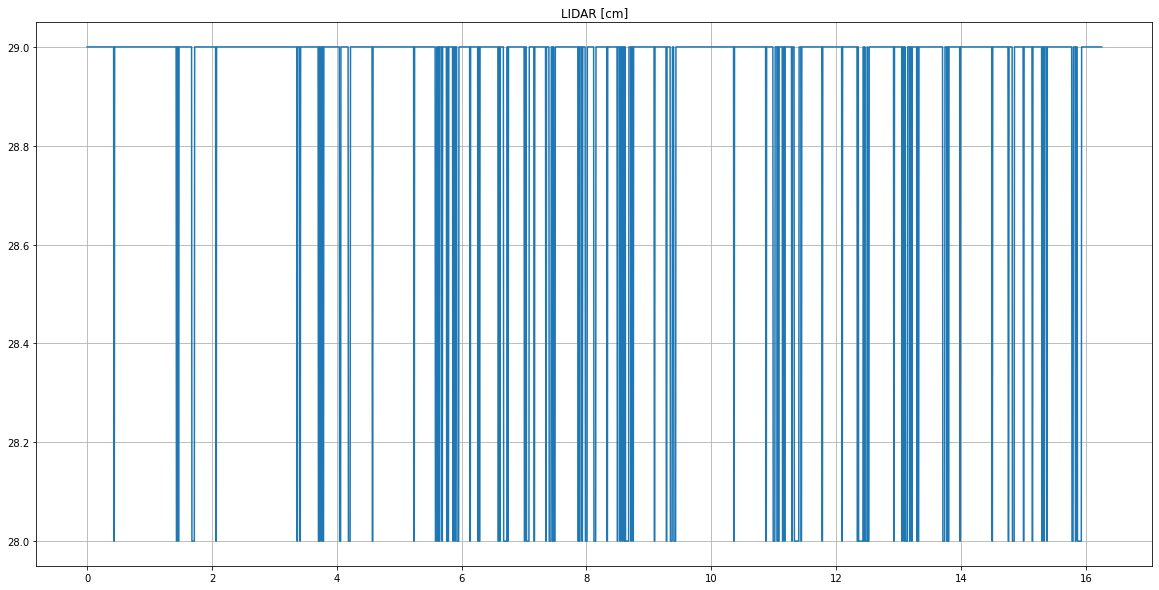

In [157]:
# lidar = [x if x < 100 else 0 for x in lidar]

plt.figure(figsize=(20,10))
plt.plot(ts, lidar)
plt.title("LIDAR [cm]")
plt.grid(True);

# Save

Now that the data is checked and appears to be good, save a copy of the parsed data.

In [164]:
sdata = {
    "accel": accel,
    "mag": mag,
    "gyro": gyro,
    "imutemp": temp,
    "temp": tp[:,0],
    "press": tp[:,1],
    "lidar": lidar,
    "ts": ts
}

storage.write(f"parsed-data-{datetime.date.today().isoformat()}.pickle", sdata)